In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

In [ ]:
dataset = pd.read_csv('loan_train.csv')

In [ ]:
dataset.head()

In [ ]:
dataset.shape

In [ ]:
dataset.describe()

In [ ]:
drop_columns = ["Unnamed: 0", "Unnamed: 0.1"]
dataset.drop(labels= drop_columns, axis=1, inplace=True)

In [ ]:
dataset.head()

In [ ]:
dataset.shape

In [ ]:
dataset.dtypes

In [249]:
dataset['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [250]:
dataset['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [251]:
dataset['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [252]:
# z = dataset.iloc[:, 0:1].values

In [253]:
# Any text data needs to be converted into numbers that our model can use,
# We'll also fill any empty cells with 0:

# dataset = pd.get_dummies(dataset, columns=["education"])
# dataset.fillna(value=0.0, inplace=True)

In [254]:
# Any text data needs to be converted into numbers that our model can use,
# We'll also fill any empty cells with 0:

# dataset = pd.get_dummies(dataset, columns=["Gender"])
# dataset.fillna(value=0.0, inplace=True)

In [255]:
# Any text data needs to be converted into numbers that our model can use,
# We'll also fill any empty cells with 0:

# dataset = pd.get_dummies(dataset, columns=["loan_status"])
# dataset.fillna(value=0.0, inplace=True)

In [256]:
dataset['due_date'] = pd.to_datetime(dataset['due_date'])
dataset['effective_date'] = pd.to_datetime(dataset['effective_date'])

In [257]:
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [258]:
dataset.shape

(346, 8)

In [259]:
dataset.dtypes

loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

In [260]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



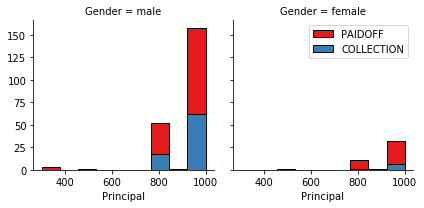

In [263]:
import seaborn as sns

bins = np.linspace(dataset.Principal.min(), dataset.Principal.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

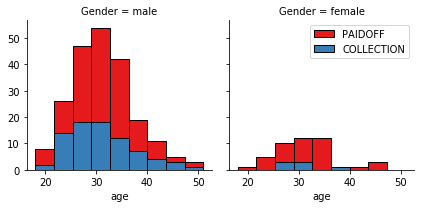

In [265]:
bins = np.linspace(dataset.age.min(), dataset.age.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

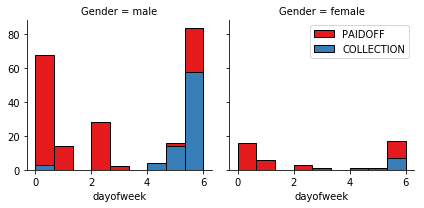

In [267]:
dataset['dayofweek'] = dataset['effective_date'].dt.dayofweek
bins = np.linspace(dataset.dayofweek.min(), dataset.dayofweek.max(), 10)
g = sns.FacetGrid(dataset, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [271]:
dataset['weekend'] = dataset['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [272]:
dataset.shape

(346, 10)

# Convert Categorical features to numerical values

In [274]:
# Lets look at gender:
dataset.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [276]:
# Lets convert male to 0 and female to 1:
dataset['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [277]:
dataset['Gender'] = dataset['Gender'].astype('float')
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0.0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1.0,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0.0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1.0,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0.0,4,1


In [278]:
dataset['Gender'] = dataset['Gender'].astype('int')
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


# One Hot Encoding

How about education?

In [280]:
dataset.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [283]:
dataset[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [285]:
Feature = dataset[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(dataset['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


# Feature selection

Lets defind feature sets, X:

In [286]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [287]:
y = dataset['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [289]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# K Nearest Neighbor(KNN)

In [329]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

In [330]:
# Preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [331]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [334]:
y_pred = classifier.predict(X_test)

In [335]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 5 10]
 [ 8 47]]
              precision    recall  f1-score   support

  COLLECTION       0.38      0.33      0.36        15
     PAIDOFF       0.82      0.85      0.84        55

   micro avg       0.74      0.74      0.74        70
   macro avg       0.60      0.59      0.60        70
weighted avg       0.73      0.74      0.74        70

0.7428571428571429


In [336]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

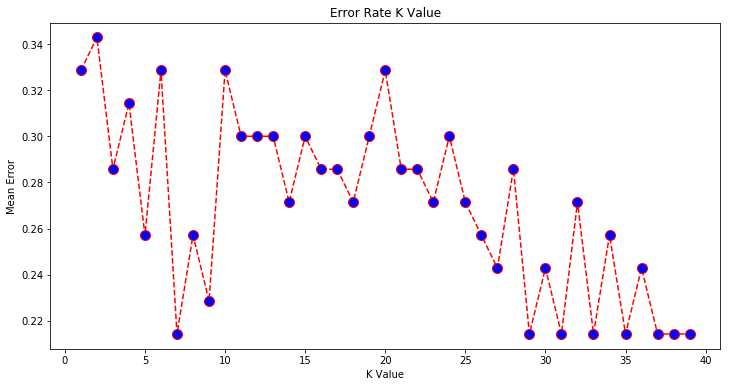

In [337]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [338]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [339]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 6  9]
 [ 6 49]]
              precision    recall  f1-score   support

  COLLECTION       0.50      0.40      0.44        15
     PAIDOFF       0.84      0.89      0.87        55

   micro avg       0.79      0.79      0.79        70
   macro avg       0.67      0.65      0.66        70
weighted avg       0.77      0.79      0.78        70

0.7857142857142857


# Decision Tree

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [398]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
classifier # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [399]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediction

Let's make some predictions on the testing dataset and store it into a variable called y_pred

In [400]:
y_pred = classifier.predict(X_test)

# Evaluation

Next, let's import metrics from sklearn and check the accuracy of our model.

In [401]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.7884615384615384


# Support Vector Machine

In [ ]:
#  the model_selection library of the Scikit-Learn library contains the train_test_split
# method that allows us to seamlessly divide data into training and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 10)

In [ ]:
# Training the Algorithm

#from sklearn.svm import SVC   # Support Vector Classifier
#svclassifier = SVC(kernel='linear')#This class takes one parameter,which is the kernel type
#svclassifier.fit(X_train, y_train)

In [ ]:
#y_pred = svclassifier.predict(X_test)

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test, y_pred))

# Kernel SVM

 Polynomial Kernel

In [ ]:
# Polynomial Kernel
from sklearn.svm import SVC   # Support Vector Classifier
classifier = SVC(kernel ='poly', degree= 8)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))